<a href="https://colab.research.google.com/github/karaposu/ML_Example_Codes/blob/main/VAE_inspected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IMPORTS

In [1]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import torch
import numpy as np

In [2]:
def retrieve_dataset_from_dataloader(loader):
    full_data=[]
    for data , target in loader:
      full_data.extend(data)
    return full_data



def check_shape_and_type_of_loaderdata(loader):
  counter=0
  sample=0
  sample_target=0
  for e , i in loader:
    if counter==0:
      sample=e
      sample_target=i
      counter+counter+1
    break


  print("________________________________________")
 
  print("For Loader data:" )
  print("Shape data: ",  e.shape, "Dtype data: ",e.dtype )
  print("Shape label: ",sample_target.shape, "      Dtype label: ",sample_target.dtype )
  print("________________________________________")


  return e,sample_target

##GET DATA

In [3]:

torch.manual_seed(7)
batch_size=64


train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True,)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



##MODEL

In [4]:


class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.fc1 = nn.Linear(784, 400)
        self.fc21 = nn.Linear(400, 20)
        self.fc22 = nn.Linear(400, 20)
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, 784)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [5]:
def xray(x ):
    # !pip install -U varname
    # from varname import varname, nameof
    # name= nameof(x)
    
    if isinstance(x, list):
      if isinstance(x[0], torch.Tensor):
        print("List of Tensors,", " Len:", len(x), ", e[0] shape:" , x[0].shape  )
      else:
        print("List,", " Len:", len(x), ", Type-e[0]:" , type(x[0])  )
    elif isinstance(x, (np.ndarray, np.generic) ):
        print("np.array,", " Shape:", x.shape )    
    elif isinstance(x, dict):
      e=list(x.values())[0]
      k=list(x.keys())[0]
      print("Dict,", "Len:", len(x), " Keys (Tensor): ", k.shape, " Values (Tensor): " , e.shape  )
    elif isinstance(x, tuple):
       if isinstance(x[0], torch.Tensor):
          print("Tuple of Tensors,", " Len:", len(x), ", e[0] shape:" , x[0].shape  )
       else:
          print("Tuple,", " Len:", len(x), ", Type-v[0]:" , type(x[0])  )


    elif isinstance(x, torch.Tensor):
        print("Tensor,", " Shape:", x.shape  )
    

##CUSTOM LOSS

In [6]:
# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD

##TRAIN FUNCTION

In [7]:
def train_function( model,train_loader):
    model.train()
    train_loss = 0
    for data, _ in train_loader:
       
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    avg_loss= train_loss / len(train_loader.dataset)
   
    return avg_loss


def eval_function(model,test_loader):
    model.eval()
    test_loss = 0
    reconstructed_data= []
    
    for data, _ in test_loader:
        batch_size=data.size()[0]
        recon_batch, mu, logvar = model(data)
        reconstructed_data.append(recon_batch.detach())

    return reconstructed_data
        
       

    
    

##MAIN

In [8]:

model = VAE()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epoch=100

check_shape_and_type_of_loaderdata(train_loader)

for i in range(6):
    all_predictions=[]
    train_loss=train_function( model,train_loader)
    print("epoch:" , i, "loss:" , train_loss)
    if (epoch + 1) % 1 == 0:
      outputs = eval_function(model, test_loader)
      for e in outputs:
            e=e.view(-1, 1, 28, 28)
            all_predictions.extend(e)
            
           
      
          



________________________________________
For Loader data:
Shape data:  torch.Size([64, 1, 28, 28]) Dtype data:  torch.float32
Shape label:  torch.Size([64])       Dtype label:  torch.int64
________________________________________
epoch: 0 loss: 147.44501380208334
List of Tensors,  Len: 10000 , e[0] shape: torch.Size([1, 28, 28])
epoch: 1 loss: 115.85013266601563
List of Tensors,  Len: 10000 , e[0] shape: torch.Size([1, 28, 28])
epoch: 2 loss: 111.41283131917318
List of Tensors,  Len: 10000 , e[0] shape: torch.Size([1, 28, 28])
epoch: 3 loss: 109.36431760660807
List of Tensors,  Len: 10000 , e[0] shape: torch.Size([1, 28, 28])
epoch: 4 loss: 108.19514936523437
List of Tensors,  Len: 10000 , e[0] shape: torch.Size([1, 28, 28])
epoch: 5 loss: 107.33778330078125
List of Tensors,  Len: 10000 , e[0] shape: torch.Size([1, 28, 28])


In [12]:
print(all_predictions[0].shape)
print(len(all_predictions))

all_test_data =retrieve_dataset_from_dataloader(test_loader)
xray(all_test_data)



n=5
first_n_output_samples= all_predictions[:n]
first_n_samples= all_test_data[:n]


xray(first_n_samples)

first_n_output_samples = torch.stack(first_n_output_samples)
first_n_samples = torch.stack(first_n_samples)


img_comparison = torch.cat([first_n_samples, first_n_output_samples])
save_image(img_comparison.cpu(), './reconstruction_' + str(1) + '.png', nrow=n)

sample = torch.randn(64, 20)
sample = model.decode(sample).cpu()
save_image(sample.view(64, 1, 28, 28),'./sample_' + str(1) + '.png')


torch.Size([1, 28, 28])
10000
List of Tensors,  Len: 10000 , e[0] shape: torch.Size([1, 28, 28])
List of Tensors,  Len: 5 , e[0] shape: torch.Size([1, 28, 28])


Original and Reconstructed data:


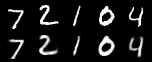

 
artificial_images:


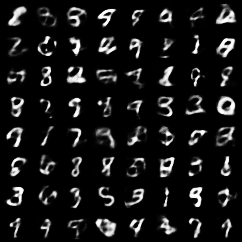

In [15]:
import cv2
from google.colab.patches import cv2_imshow


image = cv2.imread('reconstruction_1.png')
artificial_images = cv2.imread('sample_1.png')

print("Original and Reconstructed data:")
cv2_imshow( image)
print(" ")
print("artificial_images:")
cv2_imshow( artificial_images)
